<a href="https://colab.research.google.com/github/ralsouza/data_visualisation_matplotlib_seaborn/blob/master/notebooks/03_exercices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Load dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/05_data_visualisation_matplotlib_seaborn/data/dataframe_saved_v2.csv', parse_dates=['Data'])

In [0]:
# Check column data types
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [0]:
# Change column names
df.columns = ['date','distance','time','seconds','minutes','min_per_km']

In [30]:
# https://medium.com/@jman4190/explaining-the-inplace-parameter-for-beginners-5de7ffa18d2e
# inplace: Do you want to overwrite the existing dataframe?
# True: yes | False: no
df.sort_index(inplace=True)
df.head()

,date,distance,time,seconds,minutes,min_per_km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [0]:
# Describing
df.describe()

,distance,seconds,minutes,min_per_km
count,81.000000,52.000000,52.000000,52.000000
mean,3.137531,1901.788462,31.696474,7.725297
std,3.634519,2560.424171,42.673736,0.954475
min,0.650000,376.000000,6.266667,6.000000
25%,1.370000,583.750000,9.729167,7.020479
50%,2.100000,1343.500000,22.391667,7.533333
75%,3.050000,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000


In [5]:
# 1. What is the maximal value from column minutes?
df['minutes'].max()

260.71666666666664

In [49]:
# 2. What's the minimal values more than 2.0 from column distance?
df['distance'][df.distance > 2.0].min()

2.01

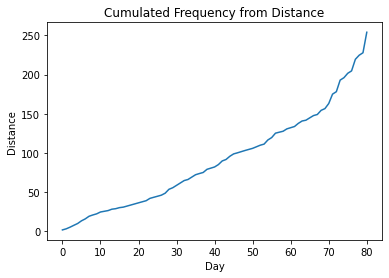

In [47]:
# 3. Make a plot with the cumulated frequency from column distance.
df['distance'].cumsum().plot()
plt.title('Cumulated Frequency from Distance')
plt.xlabel('Day')
plt.ylabel('Distance')
plt.show()

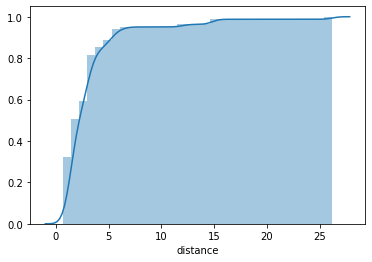

In [0]:
kwargs = {'cumulative':True}
sns.distplot(df['distance'],hist_kws=kwargs,kde_kws=kwargs)
plt.show()

In [45]:
# 4. What's the day of the week in the 0 position?
df['date'][0].strftime('%A')

'Sunday'

In [41]:
# 5. What's the days of week in the first five positions?
df['date'].map(lambda x:x.strftime('%A')).head(5)

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: date, dtype: object

In [0]:
# 6. Make a new column in the dataframe with the days of week to each rows.
df['day_of_week'] = df['date'].map(lambda x:x.strftime('%A'))

In [53]:
# Show dataframe
df

,date,distance,time,seconds,minutes,min_per_km,day_of_week
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday
...,...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437,Thursday
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459,Friday
78,2015-12-26,5.20,NaN,NaN,NaN,NaN,Saturday
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037,Wednesday
